**Analysis of the cow market with the construction of models**
_____
**Description of the study.**
In this project, I will study cows, the parameters on which milk yield / taste depends. Based on this, I will train a model that will predict the annual milk yield, as well as the taste of milk. Thanks to these two models, the farmer will be able to make the right choice when buying a cow and get the maximum profit for them
_____
**The purpose of the study.**
To understand which cows are most suitable for the farmer's needs and which of them will allow him to earn more money

_____
**Research objectives.**
Preprocessing the data, getting rid of outliers, correcting data types, then conducting a research analysis of the data to determine dependencies and so on, studying the correlation table - selecting qualitative parameters for models, training models, configuring them - using the most accurate models to predict milk yield/taste

_____
**Initial data.**

3 files:

<b>ferma_main</b>:  
id - is the unique identifier of the cow.  
milk_yiled, kg — the mass of milk that a cow gives per year (in kilograms).    
EKE (Energy feed unit) is an indicator of the nutritional value of cow feed.   
raw_protein, g — the content of crude protein in the feed (in grams).  
SPO (Sugar-Protein ratio) is the ratio of sugar to protein in cow feed.   
species - is a cow breed.     
type_pasture - is the landscape of meadows where a cow grazed.   
father_species - is the breed of Daddy's cow.   
fat, % — the fat content in milk (as a percentage).  
protein, % — protein content in milk (as a percentage).  
tate - is an assessment of taste according to the personal criteria of the farmer, a binary sign (tasty, not tasty).   
Age is the age of the cow, a binary sign (less than 2 years old, more than 2 years old).   

<b>ferma_dad</b>  
id is the unique identifier of the cow.  
father_name - is the name of the pope of the cow.  

<b>cow_buy</b>  
species - is a cow breed.   
type_patsture - is the landscape of meadows where a cow grazed.    
father_species is the breed of Daddy's cow.    
father_name is the name of the cow's daddy.   
fat - ,% — the fat content in milk (as a percentage).     
protein -,% is the protein content in milk (as a percentage).   
age - is the age of the cow, a binary sign (less than 2 years old, more than 2 years old).   
______


**This study will be divided into several parts.**

***Part 1. Studying general information:***
* [1. Studying data files, getting general information, downloading libraries.](#1)
***Part 2. Data preparation:***
* [1. ferma_main preprocessing.](#2)
* [2. ferma_dad preprocessing](#3)
* [3. cow_buy preprocessing](#4)
* [4. Stage output](#5)

***Part 3. Research data analysis:***
* [1. ferma_main research](#fm_all)
* [1. Milk yield research](#yield)
* [1.2 EKE research](#eke)
* [1.3 Crude Protein Study](#rp)
* [1.4 SPO Study](#spo)
* [1.5 Breed Study](#spec)
    * [1.6 Pasture type study](#pasture)
* [1.7 Father breed Study](#father)
    * [1.8 Fat Research](#fat)
    * [1.9 Protein Research](#protein)
    * [1.10 Taste Study](#taste)
* [1.11 Age Study](#age)
* [2. ferma_dad research](#fd)
* [3. cow_buy research](#cb)    
    * [3.1 Breed Research](#cb-spec) 
    * [3.2 Pasture research](#cb-pasture)
* [3.3 Father's Breed Research](#cb-father)
    * [3.4 Father's Name Research](#cb-father-name)
    * [3.5 Fat Research](#cb-fat)
* [3.6 Protein Research](#cb-protein)
    * [3.7 Age Study](#cb-age)
* [4. Stage Conclusions](#3final) 

***Part 4. Correlation analysis of features:***
* [1. Studying the relationship between signs](#4-corr)
* [2. Scattering graphs](#4-rass)
    * [2.1 Milk yield and EKE](#4-1)
* [2.2 Milk yield and crude protein](#4-2)
* [2.3 Milk yield and SPO](#4-3)
* [2.4 Milk yield and fats](#4-4)
* [2.5 Milk yield and proteins](#4-5)
* [2. Output](#4-final)


***Part 5. Milk yield forecast:***
* [1. Model 1](#5-1)
* [1.1 Feature Generation](#5-1-1)
* [1.2 Sampling](#5-1-2)
* [1.3 Categorical Feature Encoding](#5-1-3)
* [1.4 Scaling](#5-1-4)
    * [1.5 Linear regression](#5-1-5)
* [1.6 Model Conclusions](#5-1-6)
* [2. Model 2](#5-2)
* [2.1 Feature Formation](#5-2-1)
* [2.2 Sampling](#5-2-2)
* [2.3 Coding of categorical features](#5-2-3)
* [2.4 Scaling](#5-2-4)
* [2.5 Linear regression](#5-2-5)
* [2.6 Model Conclusions](#5-2-6)
* [3. Model 3](#5-3)
* [3.1 Feature Formation](#5-3-1)
* [3.2 Sampling](#5-3-2)
* [3.3 Coding of categorical features](#5-3-3)
* [3.4 Scaling](#5-3-4)
    * [3.5 Linear regression](#5-3-5)
* [3.6 Model conclusions](#5-3-6)
* [4. Model comparison](#5-4)
* [5. Forecast for cows that the farmer wants to buy](#5-5)
* [6. Result](#5-6)

***Part 6. Milk taste forecast:***
* [1. Data preparation](#6-1)
* [2. Model Training](#6-2)
* [3. Studying the results](#6-3)
* [4. Working with the threshold](#6-4)
* [5. Results](#6-5)

***Part 7. Final conclusions:***
* [1. Downloading data and exploring general information](#7-1)
* [2. Data preprocessing](#7-2)
* [3. Research analysis](#7-3)
* [4. Correlation analysis](#7-4)
* [5. Regression problem](#7-5)
* [6. Classification problem](#7-6)
* [7. Recommendations for buying cows](#7-7)

<a id='1'></a>
# Downloading and exploring data (libraries)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import(
    OneHotEncoder,
    StandardScaler
)
from sklearn.linear_model import(
    LinearRegression,
    LogisticRegression
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    recall_score,
    precision_score,
    confusion_matrix,
    r2_score,
    accuracy_score
)
from pandas.api.types import is_string_dtype
from scipy import stats as st

## Data uploading

### Upload ferma_main

In [2]:
try:
    ferma_main = pd.read_csv('ferma_main.csv', sep = ';')
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')

### Upload ferma_dad

In [3]:
try:
    ferma_dad = pd.read_csv('ferma_dad.csv', sep = ';')
except:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')

### Upload cow_buy

In [4]:
try:
    cow_buy = pd.read_csv('cow_buy.csv', sep = ';')
except:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

## Examining the data

### Exploring the main file

In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [6]:
display(ferma_main.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<b> Intermediate output: </b>  
EKE, SPO, Fat Content, Protein - changing the data type from object to float  
Otherwise, there are no problems - there are no omissions (a more detailed study is at the next stage)

### Exploring ferma_dad

In [7]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [8]:
print(ferma_dad.head())

   id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин


<b> Intermediate output: </b>  
There are no problems at this stage - there are no omissions, the data types are correct (a more detailed study is at the next stage)

### Exploring cow_buy

In [9]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [10]:
print(cow_buy.head())

            Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет  


<b> Intermediate output: </b>  
Current fat content, current protein level - changing the data type from object to float   
Otherwise, there are no problems - there are no omissions (a more detailed study is at the next stage)

# Data Prepocessing 

## We put all values in lowercase to bring all datasets to a common format. This action is acceptable, since the data quality remains the same when the register is changed

In [11]:
def toLower(df):
    for i in df.columns:
        if(df[i].dtypes == 'object'):
            df[i] = df[i].str.lower()
    return df
ferma_main = toLower(ferma_main)
ferma_dad = toLower(ferma_dad)
cow_buy = toLower(cow_buy)

<a id='2'></a>
## Working with the main file

### Rename columns

In [12]:
ferma_main.columns = ['id', 'milk_yield', 'EKE', 'raw_protein', 'SPO', 'species', 'type_pasture', 'father_species', 'fat', 'protein', 'taste', 'age']

### Data types

In [13]:
ferma_main[['EKE', 'SPO', 'fat', 'protein']] = ferma_main[['EKE', 'SPO', 'fat', 'protein']].replace(',', '.', regex = True)
ferma_main[['EKE', 'SPO', 'fat', 'protein']] = ferma_main[['EKE', 'SPO', 'fat', 'protein']].astype(float)

### Processing of omissions

#### Check

In [14]:
print(ferma_main.isna().sum())

id                0
milk_yield        0
EKE               0
raw_protein       0
SPO               0
species           0
type_pasture      0
father_species    0
fat               0
protein           0
taste             0
age               0
dtype: int64


### Processing of duplicates 

#### Checking for complete duplicates

In [15]:
print(ferma_main.duplicated().sum())

5


#### Deleting of complete duplicates

In [16]:
ferma_main = ferma_main.drop_duplicates()
print(ferma_main.duplicated().sum())

0


#### Checking for implicit duplicates (Possible only in object)

In [17]:
object_columns = ['species', 'type_pasture', 'father_species', 'taste', 'age']
for i in object_columns:
    print(i, ferma_main[i].unique())

species ['вис бик айдиал' 'рефлешнсоверинг']
type_pasture ['равнинное' 'равнинные' 'холмистое']
father_species ['айдиал' 'соверин' 'айдиалл']
taste ['вкусно' 'не вкусно']
age ['более_2_лет' 'менее_2_лет']


#### Fixing implicit duplicates

In [18]:
ferma_main['type_pasture'] = ferma_main['type_pasture'].replace('равнинные', 'равнинное')
ferma_main['father_species'] = ferma_main['father_species'].replace('айдиалл', 'айдиал')

In [19]:
object_columns = ['species', 'type_pasture', 'father_species', 'taste', 'age']
for i in object_columns:
    print(i, ferma_main[i].unique())

species ['вис бик айдиал' 'рефлешнсоверинг']
type_pasture ['равнинное' 'холмистое']
father_species ['айдиал' 'соверин']
taste ['вкусно' 'не вкусно']
age ['более_2_лет' 'менее_2_лет']


<a id='3'></a>
## Working with ferma_dad

### Columns rename

In [20]:
ferma_dad.columns = ['id', 'father_name'] 

### Processing of duplicates

#### Complete duplicates check

In [21]:
print(ferma_dad.duplicated().sum())

0


#### Checking for implicit duplicates

In [22]:
print(ferma_dad['father_name'].unique())

['буйный' 'соловчик' 'барин' 'геркулес']


<a id='4'></a>
## Working with the file - cows that the farmer wants to check

### Columns rename

In [23]:
cow_buy.columns = ['species', 'type_pasture', 'father_species', 'father_name', 'fat', 'protein', 'age']

### Data type

In [24]:
cow_buy[['fat', 'protein']] = cow_buy[['fat', 'protein']].replace(',', '.', regex = True)
cow_buy[['fat', 'protein']] = cow_buy[['fat', 'protein']].astype(float)

### Processing of omissions

#### Checking of omissions

In [25]:
print(cow_buy.isna().sum())

species           0
type_pasture      0
father_species    0
father_name       0
fat               0
protein           0
age               0
dtype: int64


### Processing duplicates

#### Complete duplicates

In [26]:
print(cow_buy.duplicated().sum())

4


#### Checking for implicit duplicates (Possible only in object)

In [27]:
object_columns = ['species', 'type_pasture', 'father_species', 'father_name', 'age']
for i in object_columns:
    print(i, cow_buy[i].unique())

species ['вис бик айдиал' 'рефлешнсоверинг']
type_pasture ['холмистое' 'равнинное']
father_species ['айдиал' 'соверин']
father_name ['геркулес' 'буйный' 'барин' 'соловчик']
age ['более_2_лет' 'менее_2_лет']


<a id = '5'></a>
<p style = 'font-size = 26px'><b> Intermediate output: </b></p>
During the study of the received data, such defects were noticed as: incorrect data type, complete duplicates, implicit duplicates, omissions, different registers for the same data in different files, as well as column headers
At this stage, all these problems have been solved.

<b>General changes: </b>

The values in all files have been converted to lowercase so that there is a common format. This action is acceptable, since the meaning of the value does not depend on the case of writing.

The columns in all files are translated into English in lowercase - in a format familiar to everyone

<b>ferma_main: </b>
1. Complete duplicates - 5 complete duplicates were found - they are deleted
2. Implicit duplicates - the same types of pastures and breeds of the father were found (their spelling was different, they were brought to a common spelling) - the problem is solved
3. EKE, SPO, percentages of fat and protein - transferred from object to float.
4. General changes for all files

<b>ferma_dad: </b>
1. There are no complete duplicates
2. There are no implicit duplicates
3. Data types appropriate to the truth
4. General changes for all files

<b>cow_buy: </b>
1. Complete duplicates - 4 complete duplicates were found - they are deleted
2. No implicit duplicates found
3. Percentages of fat and protein are transferred from object to float.
4. General changes for all files

# Research data analysis

<a id='fm_all'></a>
## ferma_main

<a id='yield'></a>
### milk_yield

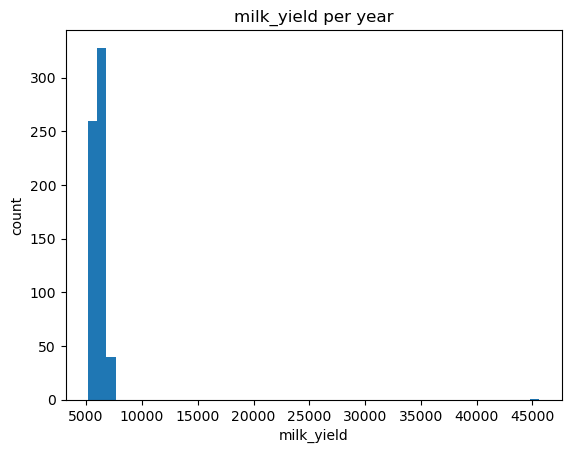

In [28]:
plt.hist(ferma_main['milk_yield'], bins = 50)
plt.xlabel('milk_yield')
plt.ylabel('count')
plt.title('milk_yield per year')
plt.show()

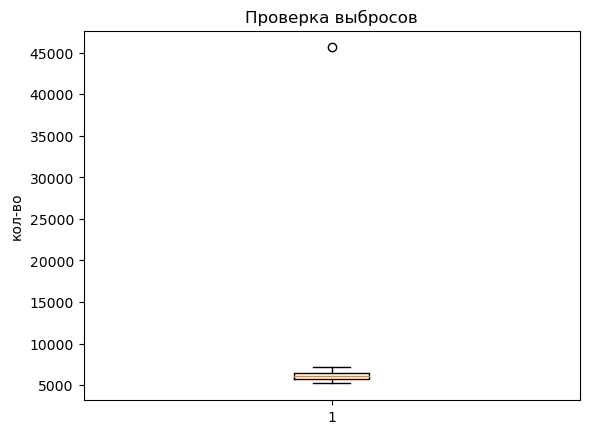

In [29]:
plt.boxplot(ferma_main['milk_yield'])
plt.xlabel('')
plt.ylabel('кол-во')
plt.title('Проверка выбросов')
plt.show()

#### Correcting an outlier

In [30]:
display(ferma_main[ferma_main['milk_yield'] > 40000])
ferma_main.loc[ferma_main['milk_yield'] > 40000, 'milk_yield']/=10
display(ferma_main[ferma_main['milk_yield'] > 40000])

,id,milk_yield,EKE,raw_protein,SPO,species,type_pasture,father_species,fat,protein,taste,age
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


,id,milk_yield,EKE,raw_protein,SPO,species,type_pasture,father_species,fat,protein,taste,age


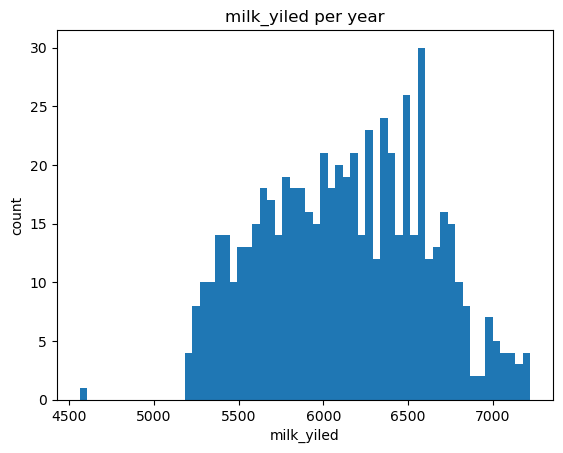

In [31]:
plt.hist(ferma_main['milk_yield'], bins = 60)
plt.xlabel('milk_yiled')
plt.ylabel('count')
plt.title('milk_yiled per year')
plt.show()

<b> Intermediate conclusion: </b>
There is an outlier - a cow with a milk yield of 45000kg => we assume that the seller made a mistake by specifying an extra 0.

The outlier is fixed

<a id='eke'></a>
### EKE

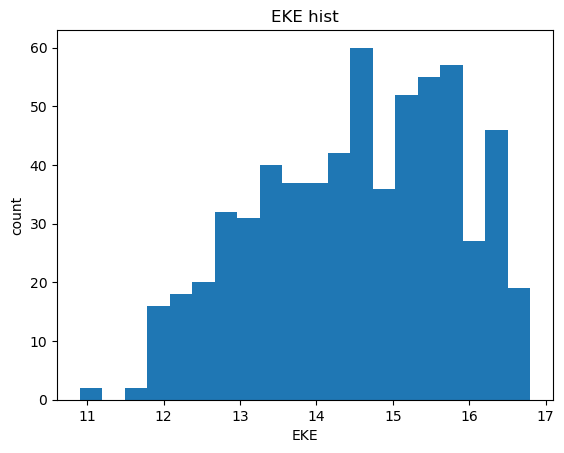

In [32]:
plt.hist(ferma_main['EKE'], bins = 20)
plt.xlabel('EKE')
plt.ylabel('count')
plt.title('EKE hist')
plt.show()

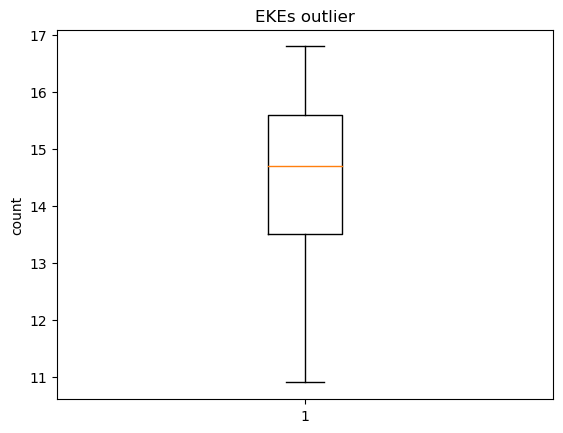

In [33]:
plt.boxplot(ferma_main['EKE'])
plt.xlabel('')
plt.ylabel('count')
plt.title('EKEs outlier')
plt.show()

<a id='rp'></a>
### raw_protein

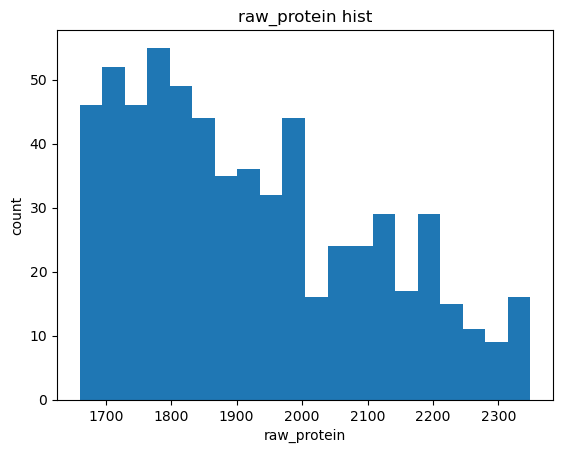

In [34]:
plt.hist(ferma_main['raw_protein'], bins = 20)
plt.xlabel('raw_protein')
plt.ylabel('count')
plt.title('raw_protein hist')
plt.show()

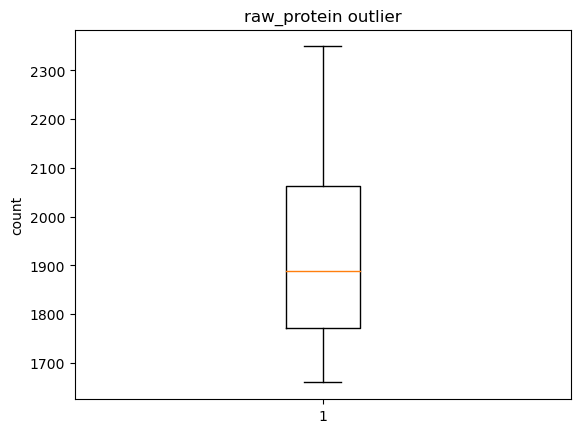

In [35]:
plt.boxplot(ferma_main['raw_protein'])
plt.xlabel('')
plt.ylabel('count')
plt.title('raw_protein outlier')
plt.show()

<a id='spo'></a>
### SPO

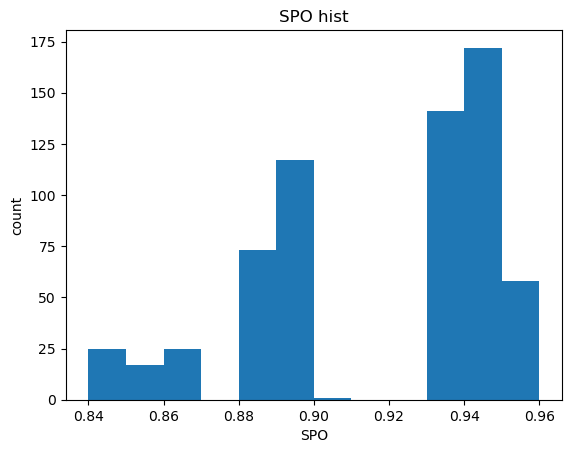

In [36]:
plt.hist(ferma_main['SPO'], bins = ferma_main['SPO'].nunique())
plt.xlabel('SPO')
plt.ylabel('count')
plt.title('SPO hist')
plt.show()

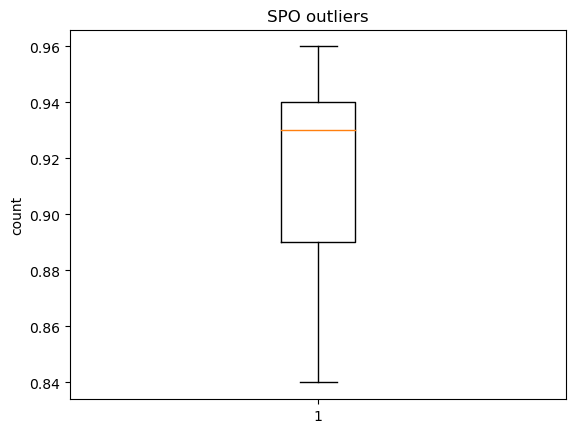

In [37]:
plt.boxplot(ferma_main['SPO'])
plt.xlabel('')
plt.ylabel('count')
plt.title('SPO outliers')
plt.show()

<a id='spec'></a>
### Species

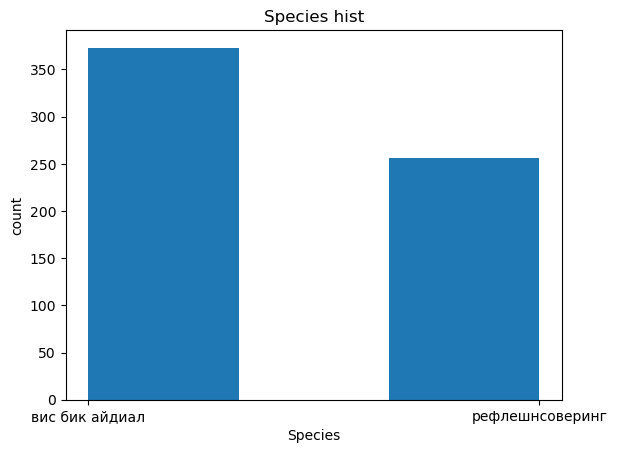

In [38]:
plt.hist(ferma_main['species'], bins = ferma_main['species'].nunique()+1)
plt.xlabel('Species')
plt.ylabel('count')
plt.title('Species hist')
plt.show()

<a id='pasture'></a>
### type_pasture

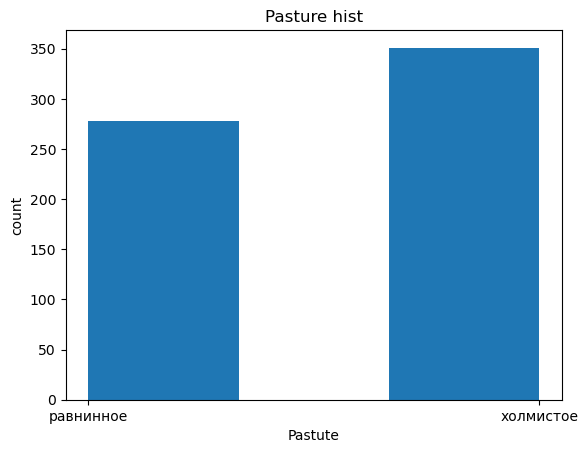

In [39]:
plt.hist(ferma_main['type_pasture'], bins = ferma_main['type_pasture'].nunique()+1)
plt.xlabel('Pastute')
plt.ylabel('count')
plt.title('Pasture hist')
plt.show()

<a id='father'></a>
### father_species

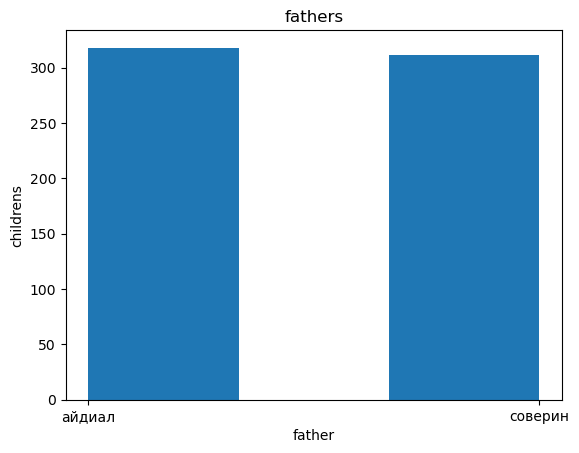

In [40]:
plt.hist(ferma_main['father_species'], bins = ferma_main['father_species'].nunique()+1)
plt.xlabel('father')
plt.ylabel('childrens')
plt.title('fathers')
plt.show()

<a id='fat'></a>
### fat

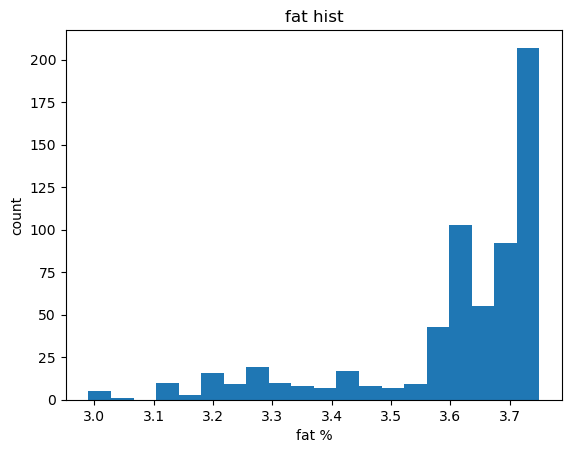

In [41]:
plt.hist(ferma_main['fat'], bins = 20)
plt.xlabel('fat %')
plt.ylabel('count')
plt.title('fat hist')
plt.show()

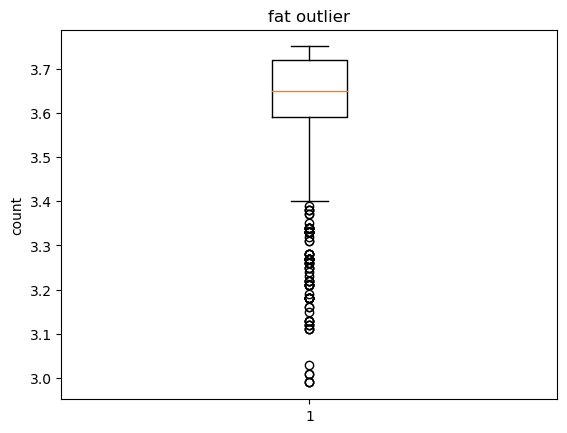

In [42]:
plt.boxplot(ferma_main['fat'])
plt.xlabel('')
plt.ylabel('count')
plt.title('fat outlier')
plt.show()

<a id='protein'></a>
### protein

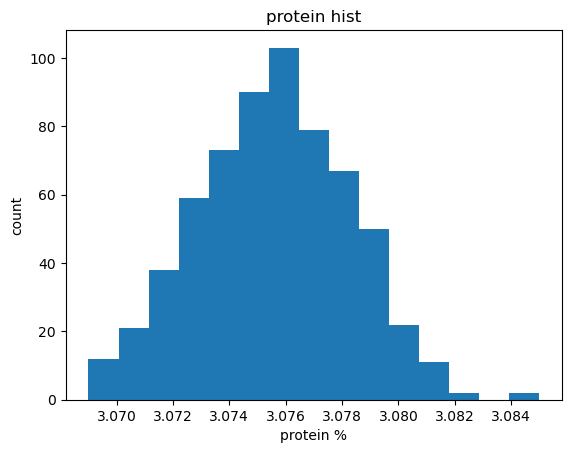

In [43]:
plt.hist(ferma_main['protein'], bins = ferma_main['protein'].nunique())
plt.xlabel('protein %')
plt.ylabel('count')
plt.title('protein hist')
plt.show()

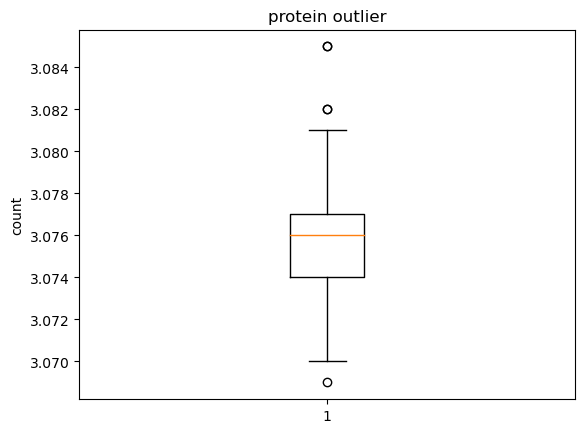

In [44]:
plt.boxplot(ferma_main['protein'])
plt.xlabel('')
plt.ylabel('count')
plt.title('protein outlier')
plt.show()

<a id='taste'></a>
### taste

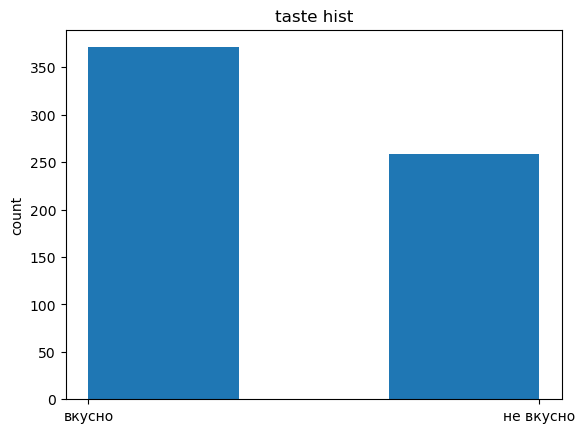

In [45]:
plt.hist(ferma_main['taste'], bins = ferma_main['taste'].nunique()+1)
plt.xlabel('')
plt.ylabel('count')
plt.title('taste hist')
plt.show()

<a id='age'></a>
### age

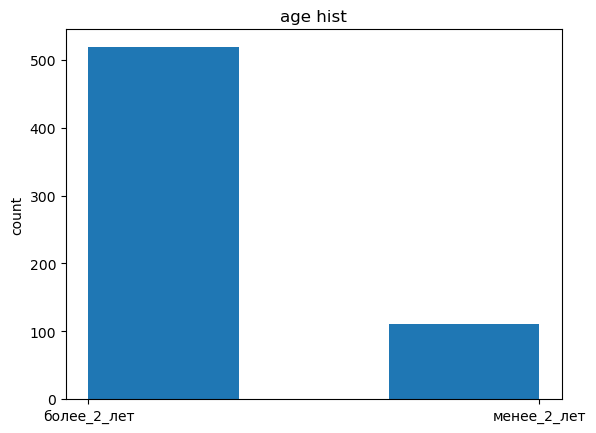

In [46]:
plt.hist(ferma_main['age'], bins = ferma_main['age'].nunique()+1)
plt.xlabel('')
plt.ylabel('count')
plt.title('age hist')
plt.show()

In [47]:
print(ferma_main.columns)

Index(['id', 'milk_yield', 'EKE', 'raw_protein', 'SPO', 'species',
       'type_pasture', 'father_species', 'fat', 'protein', 'taste', 'age'],
      dtype='object')


<b> Intermediate conclusion: </b>
An outlier was detected in the annual milk yield - it was corrected. 45000 led to 4500.
In general, polymodality is observed according to the data, many quantitative parameters have 2 or more vertices. (milk_yield, EKE, raw_protein, SPO)
protein - tends to a normal distribution (one vertex, the further away from it, the lower the value)

Data improved by removing outliers

<a id='fd'></a>
## ferma_dad

In [48]:
print(ferma_dad.columns)

Index(['id', 'father_name'], dtype='object')


  father_name  count
0    геркулес     64
1    соловчик    110
2      буйный    215
3       барин    240


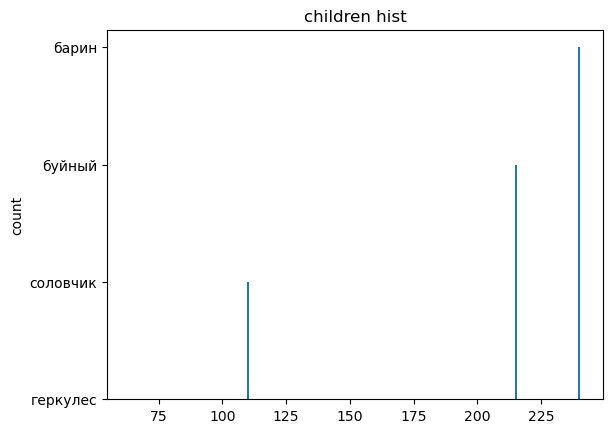

In [49]:
pivot = ferma_dad['father_name'].value_counts().sort_values().reset_index()
print(pivot)
plt.bar(height = pivot['father_name'], x = pivot['count'])
plt.xlabel('')
plt.ylabel('count')
plt.title('children hist')
plt.show()

<b> Intermediate conclusion: </b>
No problems found.
The master is the father of many children. Then, in order, there are the exuberant, soloveitchik, and Hercules

<a id='cb'></a>
## cow_buy

In [50]:
print(cow_buy.columns)

Index(['species', 'type_pasture', 'father_species', 'father_name', 'fat',
       'protein', 'age'],
      dtype='object')


<a id='cb-spec'></a>
### species 

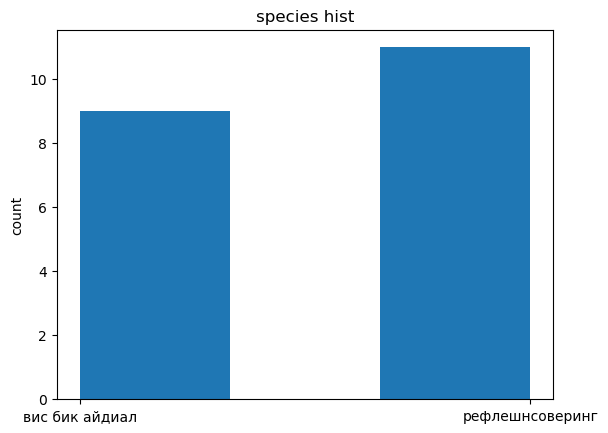

In [51]:
plt.hist(cow_buy['species'], bins = cow_buy['species'].nunique()+1)
plt.xlabel('')
plt.ylabel('count')
plt.title('species hist')
plt.show()

<a id='cb-pasture'></a>
### type_pasture

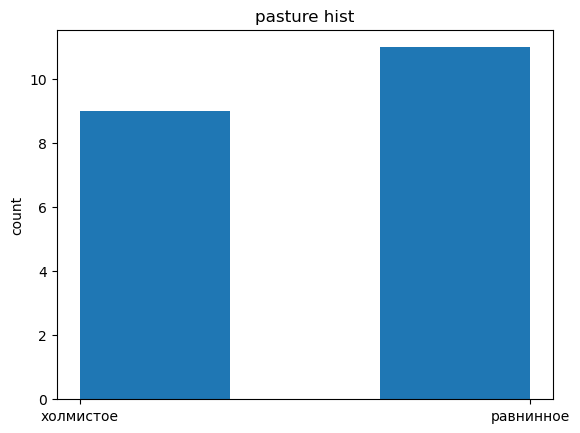

In [52]:
plt.hist(cow_buy['type_pasture'], bins = cow_buy['type_pasture'].nunique()+1)
plt.xlabel('')
plt.ylabel('count')
plt.title('pasture hist')
plt.show()

<a id='cb-father'></a>
### father_species

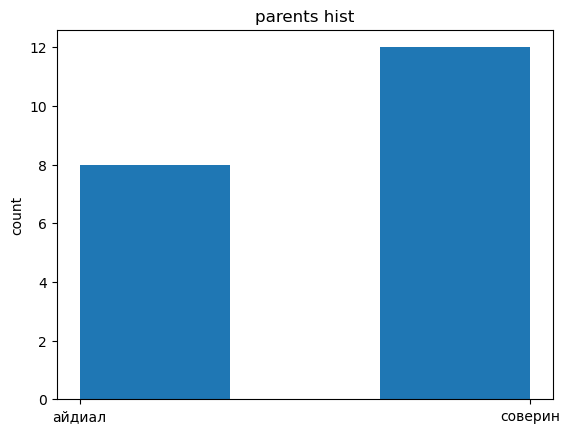

In [53]:
plt.hist(cow_buy['father_species'], bins = cow_buy['father_species'].nunique()+1)
plt.xlabel('')
plt.ylabel('count')
plt.title('parents hist')
plt.show()

<a id='cb-father-name'></a>
### father_name

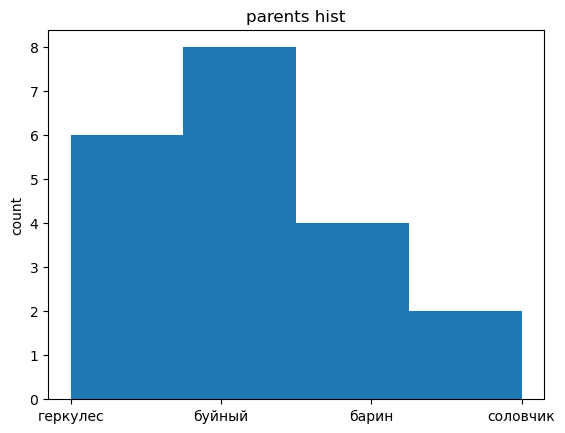

In [54]:
plt.hist(cow_buy['father_name'], bins = cow_buy['father_name'].nunique())
plt.xlabel('')
plt.ylabel('count')
plt.title('parents hist')
plt.show()

<a id='cb-fat'></a>
### fat

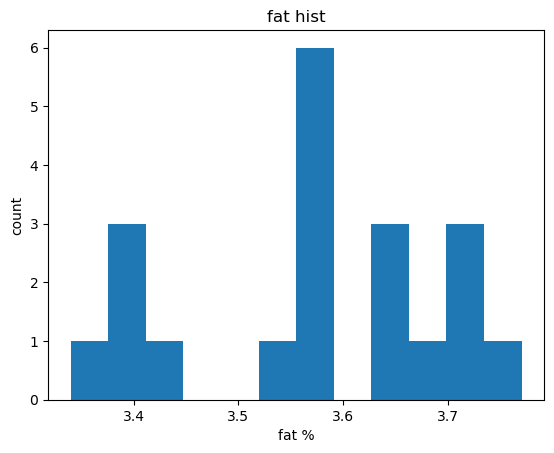

In [55]:
plt.hist(cow_buy['fat'], bins = cow_buy['fat'].nunique())
plt.xlabel('fat %')
plt.ylabel('count')
plt.title('fat hist')
plt.show()

<a id='cb-protein'></a>
### protein

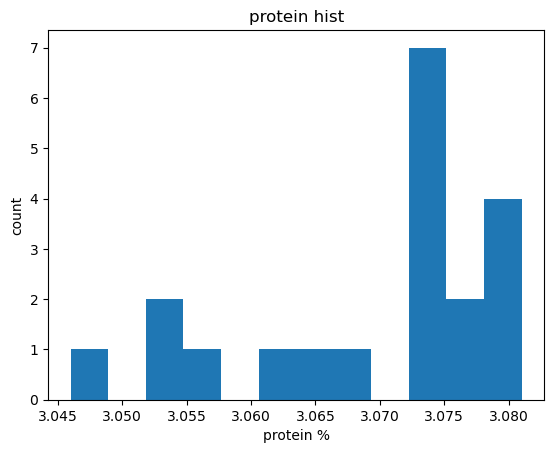

In [56]:
plt.hist(cow_buy['protein'], bins = cow_buy['protein'].nunique())
plt.xlabel('protein %')
plt.ylabel('count')
plt.title('protein hist')
plt.show()

<a id='cb-age'></a>
### age

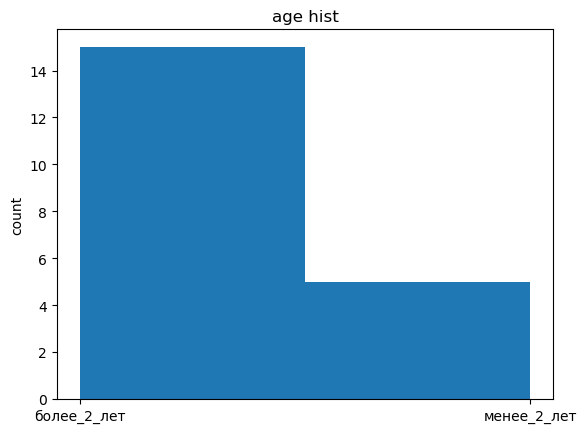

In [57]:
plt.hist(cow_buy['age'], bins = cow_buy['age'].nunique())
plt.xlabel('')
plt.ylabel('count')
plt.title('age hist')
plt.show()

<b> Intermediate conclusion: </b>
cow_boy's research allowed us to get acquainted with the interests of the farmer. There are no problems in this file

<a id = '3final'></a>  
<b> Output of the stage: </b>  
At this stage, we conducted a research analysis of three files. In the first, an outlier and unusual distributions were found. The outliers have been corrected. There were no problems in the second and third files


# Correlation analysis of features

<a id = '4-corr'></a>
## The study of the relationship between the signs.

<Axes: >

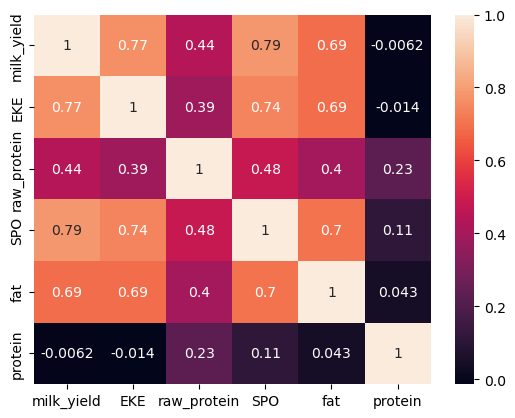

In [58]:
col_col = ['milk_yield', 'EKE', 'raw_protein', 'SPO', 'fat', 'protein']
cat_col = ['species', 'type_pasture', 'father_species', 'taste', 'age']
sns.heatmap(ferma_main[col_col].corr(method = 'spearman'), annot = True)

<b> Intermediate conclusion: </b>

milk_yield and EKE (0.77) have a strong correlation  
    milk_yield and SPO (0.79)  
    EKE and SPO (0.74)  
    SPO and fat (0.7) 
    There is a medium-strong correlation:   
    milk_yield and fat (0.69)  
    EKE and fat (0.69)   
    Protein has a very weak correlation with all parameters except raw_protein (0.23)

<a id = '4-rass'></a>
## Scattering graphs

In [59]:
col_col_without = ['EKE', 'raw_protein', 'SPO', 'fat', 'protein']
cat_col = ['species', 'type_pasture', 'father_species', 'taste', 'age']

### A function to optimize the display of scattering diagrams

In [60]:
def scatter_for_yield(col):
    for i in cat_col:
        print('A scattering diagram with a categorical parameter:', i)
        sns.scatterplot(data = ferma_main, x = col, y = 'milk_yield', hue = i)
        plt.show()   

<a id = '4-1'></a>
### milk_yield и EKE

A scattering diagram with a categorical parameter: species


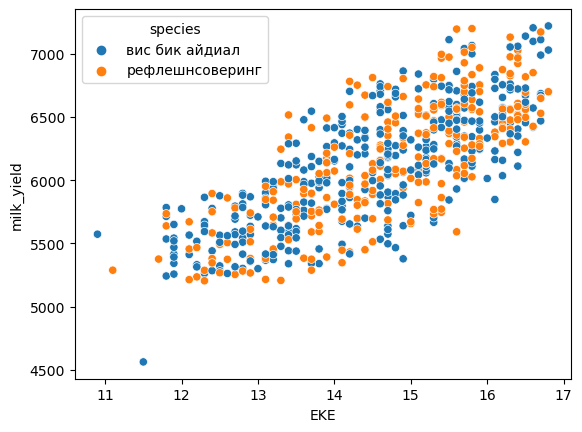

A scattering diagram with a categorical parameter: type_pasture


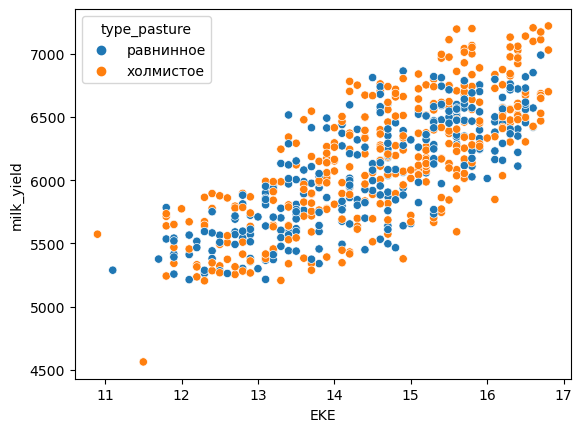

A scattering diagram with a categorical parameter: father_species


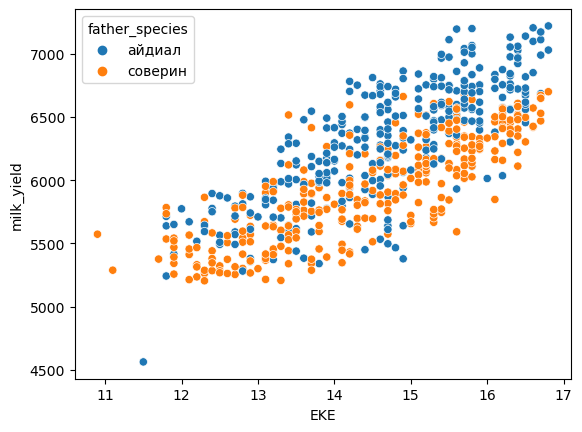

A scattering diagram with a categorical parameter: taste


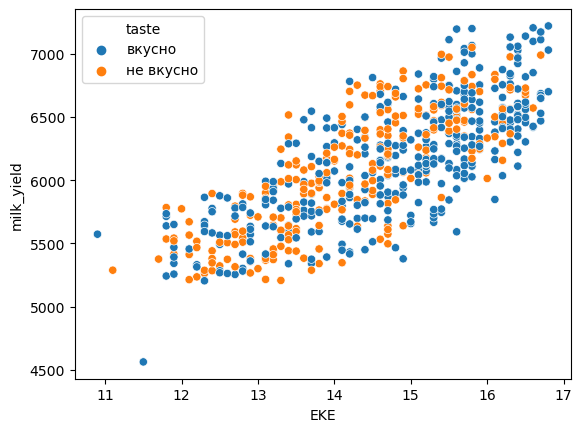

A scattering diagram with a categorical parameter: age


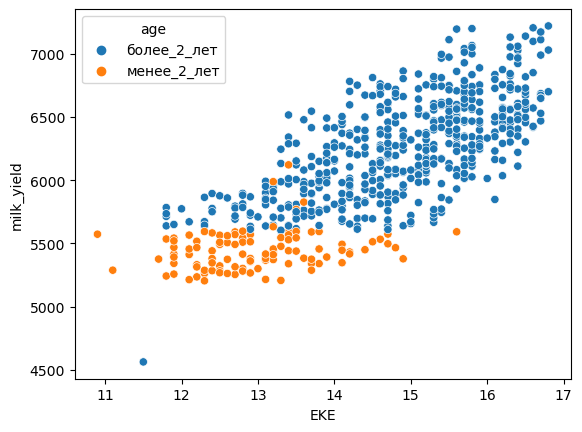

In [61]:
scatter_for_yield('EKE')

<b>Intermediate output:</b>
milk_yield to EKE - strong correlation (0.77)
species - global features and differences are not observed (cows of both breeds give different results)
type_pasture - there are no global differences, except that cows from hilly can give more milk
father_species - Ideal children give more milk than sovereign children
taste - the more EKE - the tastier
the age - adult cows give more milk

<a id = '4-2'></a>
### milk_yield и raw_protein

A scattering diagram with a categorical parameter: species


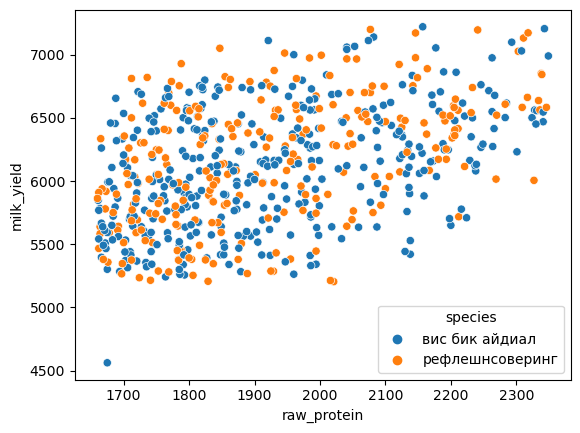

A scattering diagram with a categorical parameter: type_pasture


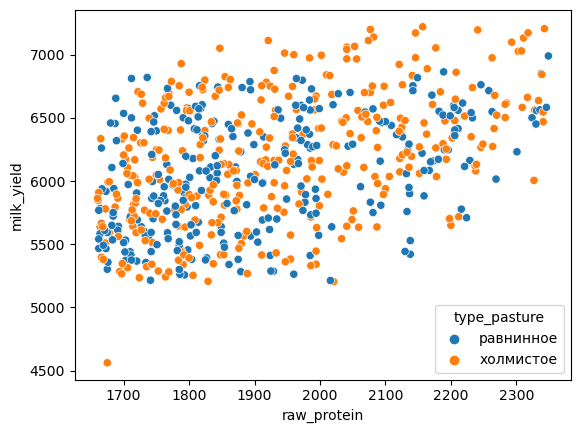

A scattering diagram with a categorical parameter: father_species


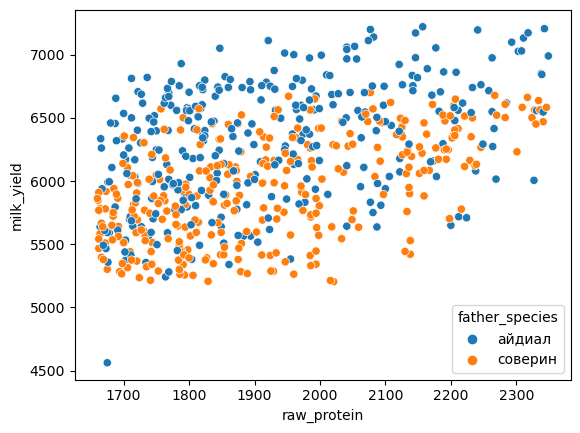

A scattering diagram with a categorical parameter: taste


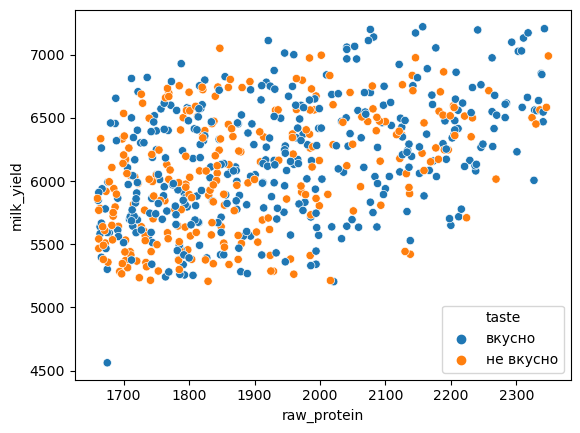

A scattering diagram with a categorical parameter: age


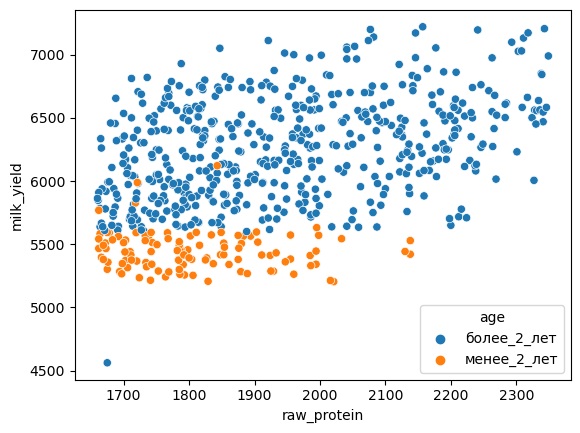

In [62]:
scatter_for_yield('raw_protein')

<b>Intermediate output:</b>
milk_yield to raw_protein - weak correlation (0.45)
species - no global features and differences observed
type_pasture - there are no global differences
father_species - Ideal children give more milk than sovereign children
taste - everything is mixed up, there are almost no differences
age - adult cows - more protein

<a id = '4-3'></a>
### milk_yield и SPO

A scattering diagram with a categorical parameter: species


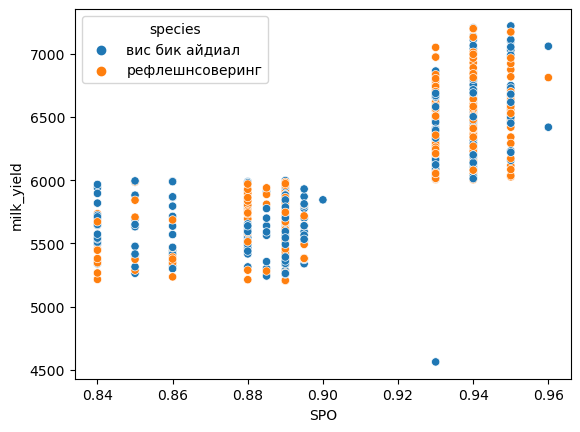

A scattering diagram with a categorical parameter: type_pasture


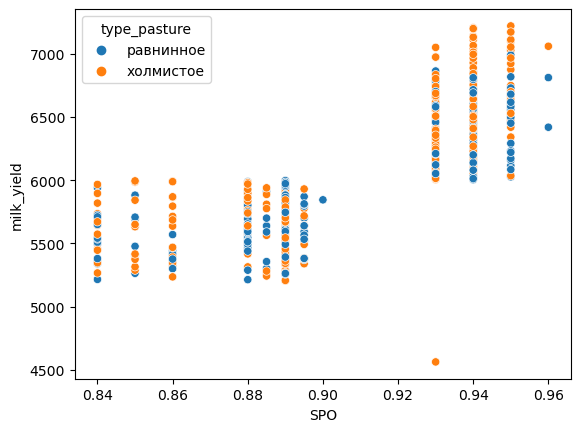

A scattering diagram with a categorical parameter: father_species


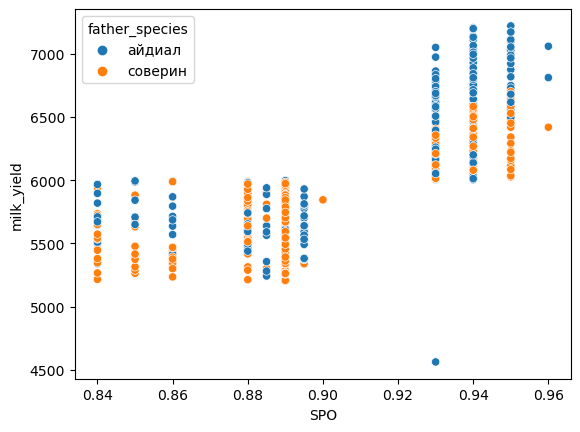

A scattering diagram with a categorical parameter: taste


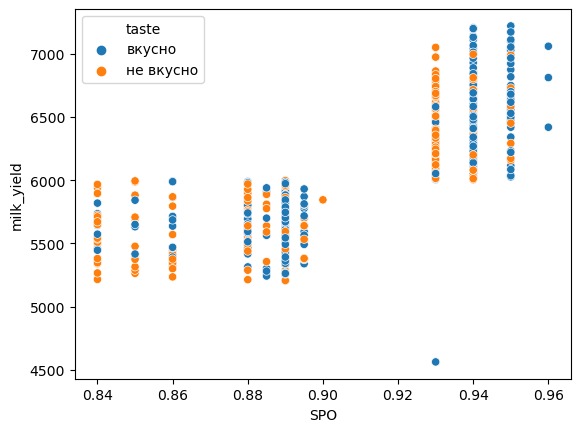

A scattering diagram with a categorical parameter: age


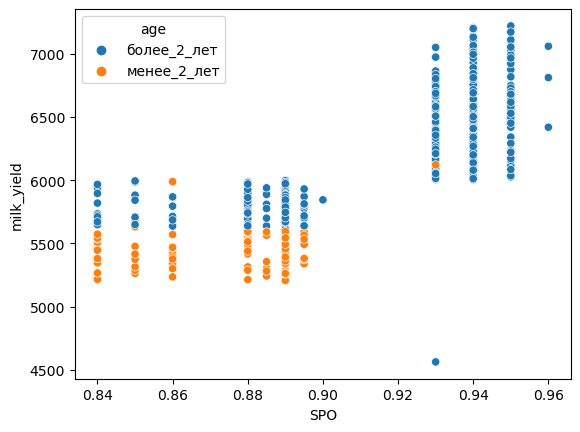

In [63]:
scatter_for_yield('SPO')

<b>Intermediate output:</b>
milk_yield to EKE - strong correlation (0.8)  
species - global features and differences are not observed (cows of both breeds give different results)  
type_pasture - there are no global differences, except that cows from hilly can give more milk  
father_species - there is no global difference  
taste - delicious milk has more SPO  
age - adult cows give more milk and they have more SPO  

<a id = '4-4'></a>
### milk_yield и fat

A scattering diagram with a categorical parameter: species


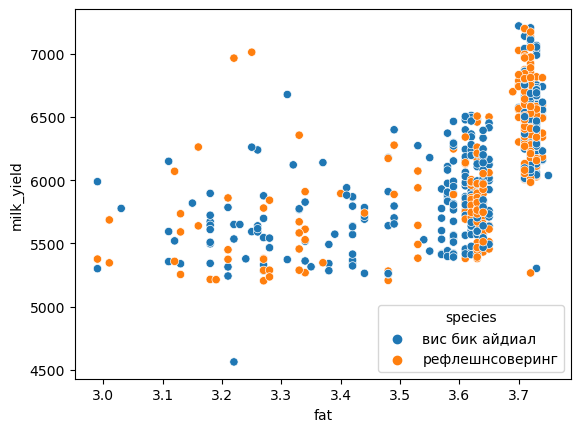

A scattering diagram with a categorical parameter: type_pasture


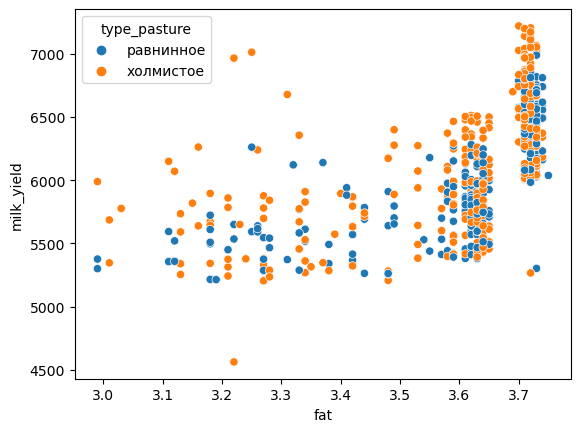

A scattering diagram with a categorical parameter: father_species


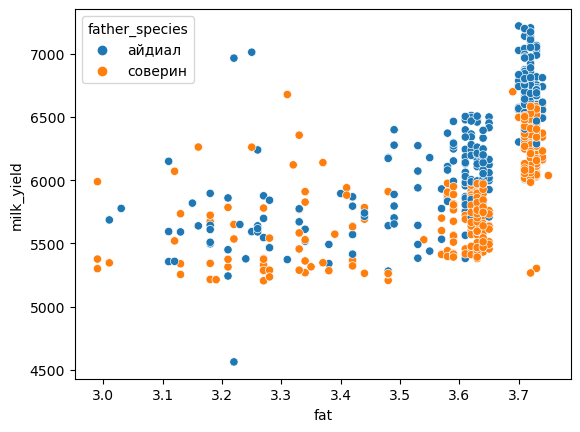

A scattering diagram with a categorical parameter: taste


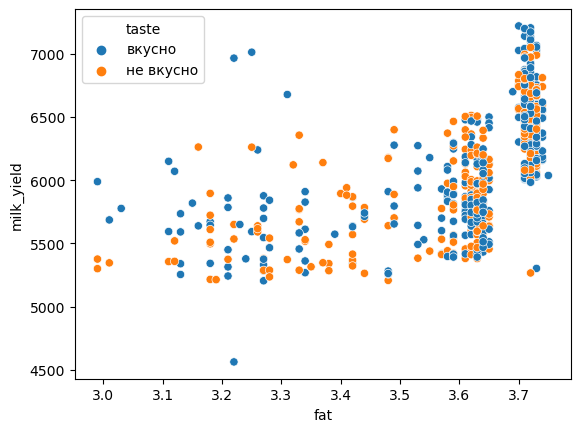

A scattering diagram with a categorical parameter: age


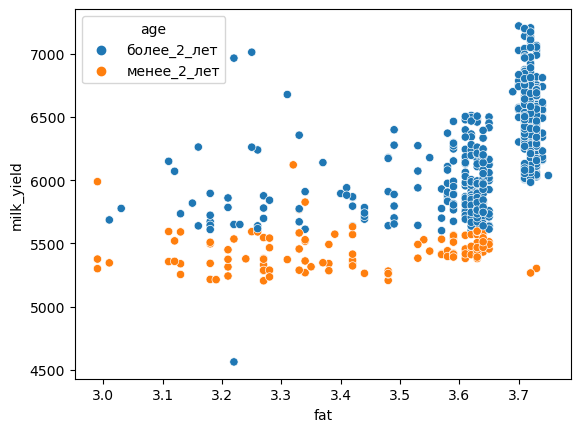

In [64]:
scatter_for_yield('fat')

<b>Intermediate output:</b>  
milk_yield to EKE - average correlation (0.6)  
species - no global difference  
type_pasture - there is no global difference  
father_species - there is no global difference  
taste - there is no global difference  
age - adult cows give more fatty milk  


<a id = '4-5'></a>
### milk_yield и protein

A scattering diagram with a categorical parameter: species


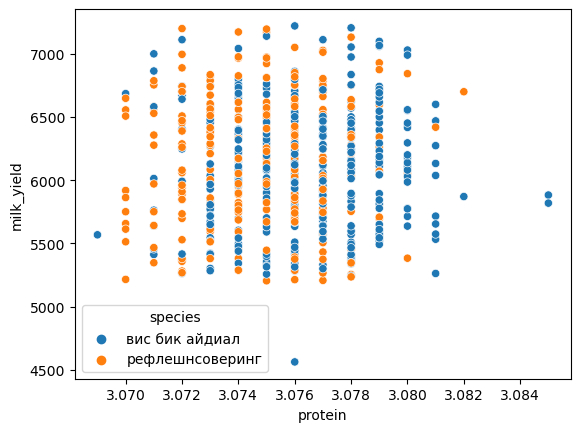

A scattering diagram with a categorical parameter: type_pasture


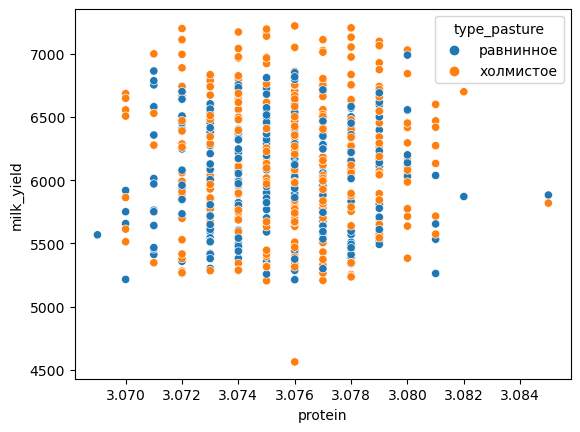

A scattering diagram with a categorical parameter: father_species


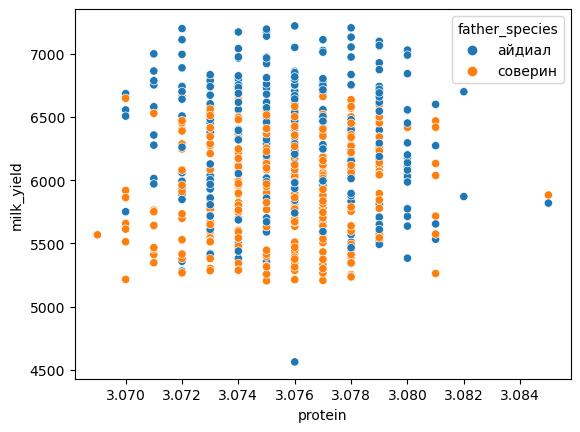

A scattering diagram with a categorical parameter: taste


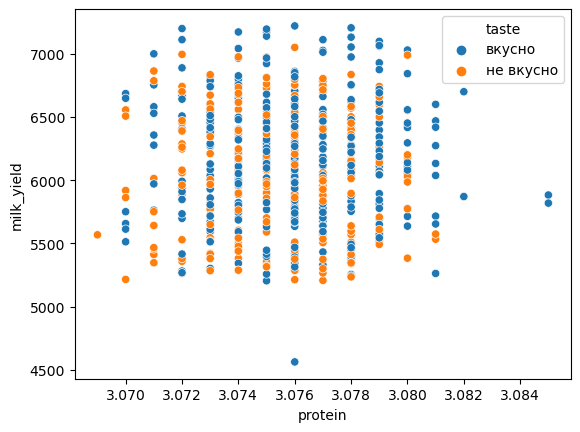

A scattering diagram with a categorical parameter: age


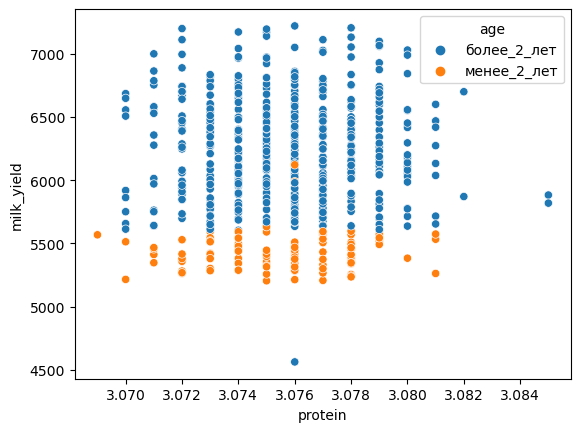

In [65]:
scatter_for_yield('protein')

<b>Intermediate output:</b>
milk_yield to protein - there is practically no correlation  
species - vis back ideal gives more protein    
type_pasture - everything is mixed up, there are almost no differences  
father_species - everything is mixed up, there are almost no differences  
taste - everything is mixed, there are almost no differences  
age - adult cows give more protein  

<a id = '4-final'></a>
<b>Stage output:</b>  

milk_yield is the target indicator, the rest are input indicators.    

Quantitative:  
milk_yield and EKE - strong bond (0.77)   
milk_yield and raw_protein - weakly-medium bond (0.45)     
milk_yield and SPO - strong bond (0.8)  
milk_yield and fat - medium bond (0.61)   
milk_yield and protein - no bond (0.0023)     

Categorical:    
The milk yield of cows with different ages is sharply reduced. If a cow is older than 2 years old, the milk yield will be much higher, the breed also has a strong effect (the Ideal has more), there are also cows in the Hilly pasture that give much more milk than in another pasture

# Regression

<a id = '5-1'></a>
## First model

<a id = '5-1-1'></a>
### Target and input signs

ACE, fat - we take it as a medium-strong linear relationship (we exclude SPO so that multicollinearity does not occur).  
Among the categorical features strongly influenced by: age and breed of the father

In [66]:
parametrs1 = ['milk_yield','EKE', 'raw_protein', 'SPO', 'species', 'type_pasture', 'father_species', 'age']
X = ferma_main[parametrs1].drop('milk_yield', axis = 1)
y = ferma_main[parametrs1]['milk_yield']

### Features suitable for the linear regression model

EXE, SO,fat, raw_protein - strong linear dependence - take them  
The age, the breed of the father and the pasture also show differences, we also take them

<a id = '5-1-2'></a>
### Splitting into samples

In [67]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

<a id = '5-1-3'></a>
### OneHotEncoder

In [68]:
print(parametrs1)
cat_col = ['species', 'type_pasture', 'father_species', 'age']
col_col = ['EKE', 'raw_protein', 'SPO']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

X_train_ohe = encoder.fit_transform(X_train[cat_col])
X_test_ohe = encoder.transform(X_test[cat_col])

names = encoder.get_feature_names_out()

X_train_ohe_df = pd.DataFrame(X_train_ohe, columns = names)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns = names)

['milk_yield', 'EKE', 'raw_protein', 'SPO', 'species', 'type_pasture', 'father_species', 'age']


<a id = '5-1-4'></a>
### StandardScaler

In [69]:
scaler = StandardScaler()

scaler.fit(X_train[col_col])

X_train_scaler = scaler.transform(X_train[col_col])
X_test_scaler = scaler.transform(X_test[col_col])

X_train_scaler_df = pd.DataFrame(X_train_scaler, columns = col_col)
X_test_scaler_df = pd.DataFrame(X_test_scaler, columns = col_col)


### Concat data

In [70]:
X_train_final = pd.concat([X_train_scaler_df, X_train_ohe_df], axis = 1)
X_test_final = pd.concat([X_test_scaler_df, X_test_ohe_df], axis = 1)

<a id = '5-1-5'></a>
### Linear regression

#### Linear regression

In [71]:
model_lr = LinearRegression()

#### Training

In [72]:
model_lr = model_lr.fit(X_train_final, y_train)

#### Prediction

In [73]:
predictions = model_lr.predict(X_test_final)

#### Difference 

       true    predicted     ostatok
494  5315.0  5234.206489   80.793511
244  6572.0  6347.287139  224.712861
551  5392.0  5496.938651 -104.938651
213  6081.0  5930.417598  150.582402
532  5772.0  6018.100584 -246.100584
..      ...          ...         ...
603  6289.0  6212.096256   76.903744
367  5733.0  5760.601795  -27.601795
79   5813.0  5906.695818  -93.695818
23   6320.0  6256.582432   63.417568
582  5980.0  5993.180049  -13.180049

[158 rows x 3 columns]


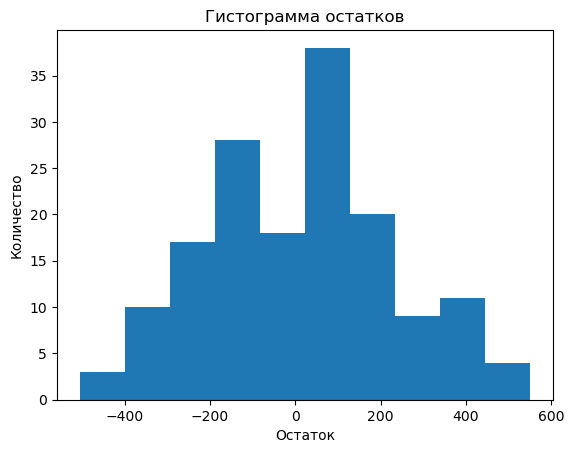

<Axes: xlabel='ostatok', ylabel='predicted'>

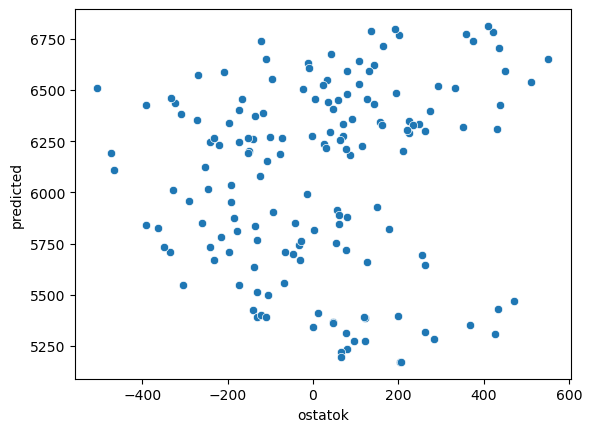

In [74]:
ostatki = pd.DataFrame()
ostatki['true'] = y_test
ostatki['predicted'] = predictions
ostatki['ostatok'] = ostatki['true'] - ostatki['predicted']
print(ostatki)

plt.hist(ostatki['ostatok'])
plt.title('Гистограмма остатков')
plt.xlabel('Остаток')
plt.ylabel('Количество')
plt.show()

sns.scatterplot(x = ostatki['ostatok'],y = ostatki['predicted'])


#### R2

In [75]:
r2 = r2_score(y_test, predictions)
print('R2 LinearRegression:',r2)

R2 LinearRegression: 0.8199171966567549


<a id = '5-1-6'></a>
<b>Intermediate output:</b>  
The quality of the model is 82%    
According to the histogram, it is clear that the model makes mistakes quite often in small deviations in both directions

<a id = '5-2'></a>
## Second model

### SPO, definding classes

In [76]:
claster_1_max = ferma_main.query('SPO<0.91')
print(claster_1_max['milk_yield'].max())

claster_2_min = ferma_main.query('SPO>0.91')
print(claster_2_min['milk_yield'].sort_values().head())

5998.0
16     4561.6
487    6005.0
66     6006.0
101    6013.0
575    6013.0
Name: milk_yield, dtype: float64


SPO divider ~ 0.91

### Modifictation ferma_main

In [77]:
ferma_main_mod = ferma_main
print(ferma_main_mod['SPO'])
#ferma_main_mod.loc[ferma_main_mod['SPO'] > 0.91, 'SPO'] = 'high'
#ferma_main_mod.loc[(is_string_dtype(ferma_main_mod['SPO']))&(ferma_main_mod['SPO'] <= 0.91), 'SPO'] = 'low'
def changer(x):
    if x<0.91:
        return 'low'
    else:
        return 'high'

ferma_main_mod['SPO'] = ferma_main_mod['SPO'].apply(lambda x: 'high' if x>=0.91 else 'low')

display(ferma_main_mod)


0      0.890
1      0.890
2      0.885
3      0.885
4      0.885
       ...  
624    0.940
625    0.880
626    0.880
627    0.890
628    0.940
Name: SPO, Length: 629, dtype: float64


,id,milk_yield,EKE,raw_protein,SPO,species,type_pasture,father_species,fat,protein,taste,age
0,1,5863.0,14.2,1743,low,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529.0,12.8,2138,low,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810.0,14.0,1854,low,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895.0,12.4,2012,low,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302.0,12.8,1675,low,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812.0,15.4,1964,high,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513.0,12.9,1700,low,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970.0,14.4,1837,low,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746.0,13.8,1994,low,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет


In [78]:
ferma_main_mod['EKE2'] = ferma_main_mod['EKE']**2

<a id = '5-2-1'></a>
### Parametrs

In [79]:
parametrs2 = ['milk_yield','EKE2', 'raw_protein', 'SPO', 'species', 'type_pasture', 'father_species', 'age']
X_mod = ferma_main_mod[parametrs2].drop('milk_yield', axis = 1)
y_mod = ferma_main_mod[parametrs2]['milk_yield']

<a id = '5-2-2'></a>
### Selection

In [80]:
RANDOM_STATE = 42
X_mod_train, X_mod_test, y_mod_train, y_mod_test = train_test_split(X_mod, y_mod, random_state = RANDOM_STATE)

<a id = '5-2-3'></a>
### OHE

In [81]:
cat_col = ['SPO', 'species', 'type_pasture', 'father_species', 'age']
col_col = ['EKE2', 'raw_protein']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

X_mod_train_ohe = encoder.fit_transform(X_mod_train[cat_col])
X_mod_test_ohe = encoder.transform(X_mod_test[cat_col])

names = encoder.get_feature_names_out()

X_mod_train_ohe_df = pd.DataFrame(X_mod_train_ohe, columns = names)
X_mod_test_ohe_df = pd.DataFrame(X_mod_test_ohe, columns = names)

<a id = '5-2-4'></a>
### Scaling

In [82]:
scaler = StandardScaler()

scaler.fit(X_mod_train[col_col])

X_mod_train_scaler = scaler.transform(X_mod_train[col_col])
X_mod_test_scaler = scaler.transform(X_mod_test[col_col])

X_mod_train_scaler_df = pd.DataFrame(X_mod_train_scaler, columns = col_col)
X_mod_test_scaler_df = pd.DataFrame(X_mod_test_scaler, columns = col_col)

### Concat

In [83]:
X_mod_train_final = pd.concat([X_mod_train_scaler_df, X_mod_train_ohe_df], axis = 1)
X_mod_test_final = pd.concat([X_mod_test_scaler_df, X_mod_test_ohe_df], axis = 1)

<a id = '5-2-5'></a>
### Linear regression

In [84]:
model_lr_mod = LinearRegression()

In [85]:
model_lr_mod = model_lr_mod.fit(X_mod_train_final, y_train)

In [86]:
predictions_mod = model_lr_mod.predict(X_mod_test_final)

In [87]:
r2 = r2_score(y_mod_test, predictions_mod)
print('R2:',r2)

R2: 0.8443136482520037


<a id = '5-2-6'></a>
<b>Intermediate output:</b>
The quality of the model increased by 2% compared to the previous version (from 82 to 84.4)

<a id = '5-3'></a>
## Third model


### Merge with dad

In [88]:
ferma_merge = pd.merge(ferma_main, ferma_dad, on = 'id')


<a id = '5-3-1'></a>
### Input and target

In [89]:
parametrs3 = ['milk_yield','EKE2', 'fat','SPO', 'age', 'father_species', 'father_name']
X_merge = ferma_merge[parametrs3].drop('milk_yield', axis = 1)
y_merge = ferma_merge[parametrs3]['milk_yield']
print(X_merge)

       EKE2   fat   SPO          age father_species father_name
0    201.64  3.58   low  более_2_лет         айдиал      буйный
1    163.84  3.54   low  менее_2_лет        соверин    соловчик
2    196.00  3.59   low  более_2_лет        соверин       барин
3    153.76  3.40   low  более_2_лет         айдиал      буйный
4    163.84  3.73   low  менее_2_лет        соверин       барин
..      ...   ...   ...          ...            ...         ...
624  237.16  3.74  high  более_2_лет         айдиал      буйный
625  166.41  3.64   low  менее_2_лет        соверин       барин
626  207.36  3.64   low  более_2_лет        соверин       барин
627  190.44  3.64   low  более_2_лет        соверин       барин
628  262.44  3.71  high  более_2_лет        соверин    соловчик

[629 rows x 6 columns]


<a id = '5-3-2'></a>
### Selection

In [90]:
RANDOM_STATE = 42
X_merge_train, X_merge_test, y_merge_train, y_merge_test = train_test_split(X_merge, y_merge, random_state = RANDOM_STATE)

<a id = '5-3-3'></a>
### OHE

In [91]:
cat_col = ['father_species', 'age',  'father_name', 'SPO']
col_col = ['EKE2', 'fat']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

X_merge_train_ohe = encoder.fit_transform(X_merge_train[cat_col])
X_merge_test_ohe = encoder.transform(X_merge_test[cat_col])

names = encoder.get_feature_names_out()

X_merge_train_ohe_df = pd.DataFrame(X_merge_train_ohe, columns = names)
X_merge_test_ohe_df = pd.DataFrame(X_merge_test_ohe, columns = names)

<a id = '5-3-4'></a>
### Scaling

In [92]:
scaler = StandardScaler()

scaler.fit(X_merge_train[col_col])

X_merge_train_scaler = scaler.transform(X_merge_train[col_col])
X_merge_test_scaler = scaler.transform(X_merge_test[col_col])

X_merge_train_scaler_df = pd.DataFrame(X_merge_train_scaler, columns = col_col)
X_merge_test_scaler_df = pd.DataFrame(X_merge_test_scaler, columns = col_col)

### Concat

In [93]:
X_merge_train_final = pd.concat([X_merge_train_scaler_df, X_merge_train_ohe_df], axis = 1)
X_merge_test_final = pd.concat([X_merge_test_scaler_df, X_merge_test_ohe_df], axis = 1)
display(X_merge_train_final)

,EKE2,fat,father_species_соверин,age_менее_2_лет,father_name_буйный,father_name_геркулес,father_name_соловчик,SPO_low
0,-0.027210,0.199205,0.0,0.0,1.0,0.0,0.0,0.0
1,0.053583,-2.618012,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.027210,0.076717,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.172927,0.199205,0.0,0.0,0.0,1.0,0.0,1.0
4,0.549923,0.566668,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
466,-0.879535,0.015473,0.0,0.0,0.0,0.0,0.0,1.0
467,-1.100407,-0.229502,1.0,1.0,0.0,0.0,0.0,1.0
468,-0.344867,0.811643,1.0,0.0,0.0,0.0,0.0,0.0
469,0.891846,0.627912,1.0,0.0,0.0,0.0,0.0,0.0


<a id = '5-3-5'></a>
### Linear Regression

In [94]:
model_merge = LinearRegression()

model_merge = model_merge.fit(X_merge_train_final, y_merge_train)

predictions_merge = model_merge.predict(X_merge_test_final)

In [95]:
r2 = r2_score(y_merge_test, predictions_merge)
print(r2)

0.855199331452326


<a id = '5-3-6'></a>
Improved the quality of the model, relative to the previous one by 1.01%

<a id = '5-4'></a>
## Comparing models

In [96]:
quality = pd.DataFrame()
quality['Metric'] = ['MSE', 'MAE', 'RMSE']
quality['model_1'] = [mean_squared_error(y_test, predictions),
                      mean_absolute_error(y_test, predictions),
                      mean_squared_error(y_test, predictions)**0.5]
quality['model_2'] = [mean_squared_error(y_mod_test, predictions_mod),
                      mean_absolute_error(y_mod_test, predictions_mod),
                      mean_squared_error(y_mod_test, predictions_mod)**0.5]
quality['model_3'] = [mean_squared_error(y_merge_test, predictions_merge),
                      mean_absolute_error(y_merge_test, predictions_merge),
                      mean_squared_error(y_merge_test, predictions_merge)**0.5]


display(quality)

,Metric,model_1,model_2,model_3
0,MSE,49345.536777,42660.523122,39677.673729
1,MAE,180.509298,164.769187,157.295287
2,RMSE,222.138553,206.544240,199.192554


In [97]:
print('95% interval of trust =', st.norm.interval(confidence=0.95, loc=np.mean(predictions_merge), scale=st.sem(predictions_merge)))

95% interval of trust = (5997.206721376748, 6140.610263397151)


The third model is the most accurate => we will use it on the farmer's data

<a id = '5-5'></a>
## Predictions for Farmer

### Adding to data

In [98]:
cow_buy_add = cow_buy

cow_buy_add['EKE2'] = (ferma_main['EKE']**2).mean()


print(ferma_main['SPO'].value_counts())
# Так как high > low => среднее значение стремится к high
cow_buy_add['SPO'] = 'high'


SPO
high    371
low     258
Name: count, dtype: int64


### OHE

In [99]:
cat_col = ['father_species', 'age', 'father_name', 'SPO']
col_col = ['EKE2','fat']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

cow_buy_add_ohe = encoder.fit_transform(cow_buy_add[cat_col])

names = encoder.get_feature_names_out()

cow_buy_add_ohe_df = pd.DataFrame(cow_buy_add_ohe, columns = names)

### Scaling

In [100]:
scaler = StandardScaler()

scaler.fit(cow_buy_add[col_col])

cow_buy_add_scaler = scaler.transform(cow_buy_add[col_col])

cow_buy_add_scaler_df = pd.DataFrame(cow_buy_add_scaler, columns = col_col)


### Concat

In [101]:
cow_buy_final = pd.concat([cow_buy_add_scaler_df, cow_buy_add_ohe_df], axis = 1)
cow_buy_final['SPO_low'] = 0
display(cow_buy_final)

,EKE2,fat,father_species_соверин,age_менее_2_лет,father_name_буйный,father_name_геркулес,father_name_соловчик,SPO_low
0,2.842171e-14,0.020225,0.0,0.0,0.0,1.0,0.0,0
1,2.842171e-14,-0.303380,1.0,1.0,1.0,0.0,0.0,0
2,2.842171e-14,0.101127,1.0,0.0,0.0,0.0,0.0,0
3,2.842171e-14,-1.436000,0.0,0.0,1.0,0.0,0.0,0
4,2.842171e-14,0.505634,0.0,0.0,1.0,0.0,0.0,0
5,2.842171e-14,0.424732,1.0,1.0,0.0,1.0,0.0,0
6,2.842171e-14,0.020225,0.0,0.0,0.0,1.0,0.0,0
7,2.842171e-14,-0.060676,1.0,0.0,1.0,0.0,0.0,0
8,2.842171e-14,0.101127,1.0,0.0,0.0,0.0,0.0,0
9,2.842171e-14,-1.436000,0.0,1.0,1.0,0.0,0.0,0


### Prediction

In [102]:
cow_buy_pred = model_merge.predict(cow_buy_final)

In [103]:
cow_buy['milk_yield'] = cow_buy_pred 

### Result

In [104]:
display(cow_buy)


,species,type_pasture,father_species,father_name,fat,protein,age,EKE2,SPO,milk_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,213.22841,high,6412.215624
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,213.22841,high,6225.421816
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,213.22841,high,6194.309657
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,213.22841,high,6390.700063
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,213.22841,high,6450.682971
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,213.22841,high,6224.443786
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,213.22841,high,6412.215624
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,213.22841,high,6422.656753
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,213.22841,high,6194.309657
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,213.22841,high,6200.962989


In [105]:
print(cow_buy.query('milk_yield>6000').shape[0])

19


<a id = '5-6'></a>
<b>Intermediate result</b>
Three models were created, among which the most accurate one was selected, then with the help of this model we predicted the yield of cows that the farmer wants to buy.

The first model:
The simplest of the three models. Both quantitative and categorical parameters were used for her training. EKE, age, father_species, fat. The accuracy of the model was 77%

The second model:
An improved version of the first model. The linear dependence of the EKE parameter was fixed, clustering was observed in the SPO parameter, which made it impossible to use this parameter as a quantitative one -> converted to a binary categorical format. Accuracy 84%

The third model:
The highest quality of the three models. Added father's name parameter -> accuracy increased to 85.5 percent

<b>The farmer's data was analyzed by the third model. As a result, we got a bunch of 19 cows, which in the future can give more than 6,000 kg of annual milk yield. </b>

# Prediction of taste

## Building a working dataset

In [106]:
taste_pred_data = ferma_merge[['taste','species', 'type_pasture', 'father_species', 'father_name', 'fat', 'protein', 'age', 'EKE2', 'SPO', 'milk_yield']]
taste_pred_data = taste_pred_data.query('milk_yield > 6000')


What does the taste of milk depend on?  
Based on the research analysis (point 3):  
1. EKE - the more, the tastier the milk   
2. raw_protein - the more, the more often delicious milk is found
3. SPO - the more, the more often delicious milk is found
4. fat is a slight difference
5. protein - most often the most delicious milk is with protein  

Other parameters:
species, type_pasture, age - parameters that can also affect the taste of milk.  

Also, cows with a milk yield of more than 6,000 kg per year are interesting for the farmer => it is reasonable to teach the model ONLY on cows with the same milk yield:  
milk_yield > 6000

<a id = '6-1'> </a>
## Processing of data

### Input and target

In [107]:
X = taste_pred_data.drop('taste', axis = 1)
y = taste_pred_data['taste']

y = y.apply(lambda x: 1 if x == 'вкусно' else 0)


### Dividing for selections

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
print(taste_pred_data.columns)

Index(['taste', 'species', 'type_pasture', 'father_species', 'father_name',
       'fat', 'protein', 'age', 'EKE2', 'SPO', 'milk_yield'],
      dtype='object')


### OHE

In [109]:
cat_col = ['species', 'type_pasture', 'father_species', 'father_name', 'age', 'SPO']
col_col = ['fat', 'protein', 'EKE2', 'milk_yield']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

X_train_ohe = encoder.fit_transform(X_train[cat_col])
X_test_ohe = encoder.transform(X_test[cat_col])

names = encoder.get_feature_names_out()

X_train_ohe_df = pd.DataFrame(X_train_ohe, columns = names)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns = names)


### Scaling

In [110]:
scaler = StandardScaler()


X_train_scaler = scaler.fit_transform(X_train[col_col])
X_test_scaler = scaler.transform(X_test[col_col])

X_train_scaler_df = pd.DataFrame(X_train_scaler, columns = col_col)
X_test_scaler_df = pd.DataFrame(X_test_scaler, columns = col_col)


### Concat

In [111]:
X_train_final = pd.concat([X_train_scaler_df, X_train_ohe_df], axis = 1)
X_test_final = pd.concat([X_test_scaler_df, X_test_ohe_df], axis = 1)

<a id = '6-2'> </a>
## Training

In [112]:
clf = LogisticRegression()
clf = clf.fit(X_train_final, y_train)

### Prediction

In [113]:
prediction = clf.predict(X_test_final)

<a id = '6-3'> </a>
## Metrics

In [114]:
acc = accuracy_score(y_test, prediction)
rec = recall_score(y_test, prediction, pos_label = 0)
prec = precision_score(y_test, prediction, pos_label = 0)

print('Accuracy: ', acc)
print("Precision:" , prec)
print('Recall:' , rec)

Accuracy:  0.6344086021505376
Precision: 0.48148148148148145
Recall: 0.3939393939393939


### Confusion Matrix

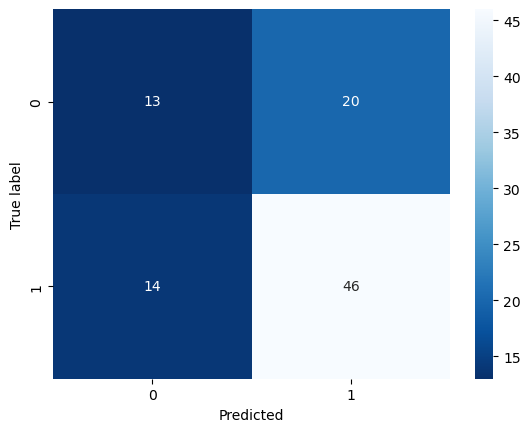

In [115]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

### Model analyze

The accuracy of the model is low - 64%
The most critical error in our case is a type 1 error. Since with her we can buy a cow with tasteless milk, hoping that the milk will be delicious => it is better to weed them out and thereby reduce our risks

<a id = '6-4'> </a>
### Working with the threshold

In [116]:
columns = []
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]

predicted_probs = clf.predict_proba(X_test_final)[:,1]

results = pd.DataFrame()

i = 0

for threshold in thresholds:
    predicted_labels = (predicted_probs >= threshold).astype(int)
    recall = recall_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    #results = results.append({'Threshold': threshold, 'Recall': recall}, ignore_index=True)
    total = predicted_labels.sum()
    results.loc[i, 'Threshold'] = threshold
    results.loc[i, 'Recall'] = recall
    results.loc[i, 'Precision'] = precision
    i+=1
    
print(results)

   Threshold    Recall  Precision
0       0.10  1.000000   0.645161
1       0.19  1.000000   0.652174
2       0.28  1.000000   0.681818
3       0.37  0.900000   0.683544
4       0.46  0.816667   0.690141
5       0.55  0.650000   0.696429
6       0.64  0.483333   0.743590
7       0.73  0.433333   0.812500
8       0.82  0.233333   0.823529
9       0.91  0.016667   1.000000


Take 0.82 to minimaze mistakes

<a id = '6-5'> </a>
### Working with farmer's data

In [117]:
cow_buy_result = cow_buy

cat_col = ['species', 'type_pasture', 'father_species', 'father_name', 'age', 'SPO']
col_col = ['fat', 'protein', 'EKE2', 'milk_yield']

encoder = OneHotEncoder(drop = 'first', sparse_output = False)

cow_buy_result_ohe = encoder.fit_transform(cow_buy_result[cat_col])

names = encoder.get_feature_names_out()

cow_buy_result_ohe_df = pd.DataFrame(cow_buy_result_ohe, columns = names)

scaler = StandardScaler()


cow_buy_result_scaler = scaler.fit_transform(cow_buy_result[col_col])

cow_buy_result_scaler_df = pd.DataFrame(cow_buy_result_scaler, columns = col_col)


cow_buy_result_final = pd.concat([cow_buy_result_scaler_df, cow_buy_result_ohe_df], axis = 1)

### Prediction

In [118]:
prediction = clf.predict(cow_buy_result_final)

In [119]:
cow_buy['predicted_taste'] = clf.predict_proba(cow_buy_result_final)[:, 1]
print(cow_buy['predicted_taste'])
cow_buy['predicted_taste'] = cow_buy['predicted_taste'].apply(lambda x: 1 if x>0.82 else 0)

0     0.603927
1     0.648735
2     0.699426
3     0.636339
4     0.572084
5     0.506045
6     0.603927
7     0.608452
8     0.699426
9     0.726553
10    0.480211
11    0.545923
12    0.484926
13    0.795130
14    0.699426
15    0.650641
16    0.573191
17    0.500946
18    0.578948
19    0.572084
Name: predicted_taste, dtype: float64


### Result

In [120]:
display(cow_buy)

,species,type_pasture,father_species,father_name,fat,protein,age,EKE2,SPO,milk_yield,predicted_taste
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,213.22841,high,6412.215624,0
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,213.22841,high,6225.421816,0
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,213.22841,high,6194.309657,0
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,213.22841,high,6390.700063,0
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,213.22841,high,6450.682971,0
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,213.22841,high,6224.443786,0
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,213.22841,high,6412.215624,0
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,213.22841,high,6422.656753,0
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,213.22841,high,6194.309657,0
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,213.22841,high,6200.962989,0


### Suitable cows

In [121]:
print(cow_buy.query('(milk_yield > 6000) & (predicted_taste != 0)'))

Empty DataFrame
Columns: [species, type_pasture, father_species, father_name, fat, protein, age, EKE2, SPO, milk_yield, predicted_taste]
Index: []


<a id = '6-6'> </a>
<b>Result</b>  
5 cows are suitable

# Final conclusion

<a id = '7-1'> </a>
## Downloading data and exploring general information

There are no problems at this stage - there are no omissions, the data types are correct (a more detailed study is at the next stage), a change in headers is required

<a id = '7-1'> </a>
## Downloading data and exploring general information

<a id = '7-2'> </a>
## Data preprocessing

During the study of the received data, such defects were noticed as: incorrect data type, complete duplicates, implicit duplicates, omissions, different registers for the same data in different files, as well as column headers
At this stage, all these problems have been solved.

<b>General changes: </b>

The values in all files have been converted to lowercase so that there is a common format. This action is acceptable, since the meaning of the value does not depend on the case of writing.

The columns in all files are translated into English in lowercase - in a format familiar to everyone

<b>ferma_main: </b>
1. Complete duplicates - 5 complete duplicates were found - they are deleted
2. Implicit duplicates - the same types of pastures and breeds of the father were found (their spelling was different, they were brought to a common spelling) - the problem is solved
3. EKE, SPO, percentages of fat and protein - transferred from object to float.
4. General changes for all files

<b>ferma_dad: </b>
1. There are no complete duplicates
2. There are no implicit duplicates
3. Data types appropriate to the truth
4. General changes for all files

<b>cow_buy: </b>
1. Complete duplicates - 4 complete duplicates were found - they are deleted
2. No implicit duplicates found
3. Percentages of fat and protein are transferred from object to float.
4. There are no general changes in all files at this stage - there are no omissions, the data types are correct (a more detailed study is at the next stage), a change in headers is required

<a id = '7-3'> </a>
## Research analysis

At this stage, we conducted a research analysis of three files. In the first, an outlier and unusual distributions were found. The outliers have been corrected. There were no problems in the second and third files. There is an abnormal distribution

<a id = '7-4'> </a>
## Correlation analysis

Quantitative:

milk_yield and EKE (0.77) have a strong correlation  
    milk_yield and SPO (0.79)  
    EKE and SPO (0.74)  
    SPO and fat (0.7)   
    There is a medium-strong correlation:   
    milk_yield and fat (0.69)  
    EKE and fat (0.69)  

Categorical:  
The milk yield of cows with different ages is sharply reduced. If a cow is older than 2 years old, the milk yield will be much higher, the breed also has a strong effect (the Ideal has more), there are also cows in the Hilly pasture that give much more milk than in another pasture

<a id = '7-5'> </a>
## Regression task


Three models were created, among which the most accurate one was selected, then with the help of this model we predicted the yield of cows that the farmer wants to buy.  

The first model:
The simplest of the three models. For her training, parameters affecting cow yield were used: this is her diet, breed, father's breed, etc. (82)  

The second model:  
An improved version of the first model. The linear dependence of the EKE parameter was fixed, clustering was observed in the SPA parameter, which made it impossible to use this parameter as a quantitative one -> converted to a binary categorical format. Accuracy increased by 2.4% (84.4%)  

The third model:
The highest quality of the three models. Added father's name parameter -> accuracy increased to 85.5 percent   

<b>The farmer's data was analyzed by the third model. As a result, we got a bunch of 20 cows, which in the future can give more than 6,000 kg of annual milk yield. </b>

<a id = '7-6'> </a>
## Classification task

The accuracy of the model is low - 64%  
The most critical error in our case is a type 1 error. Since with her we can buy a cow with tasteless milk, hoping that the milk will be delicious => it is better to weed them out and thereby reduce our risks.   

At the stage of training the model, data from cows with an annual milk yield of more than 6000 kg were used to bring the conditions as close as possible to the farm and get a more accurate result at the output

By changing the classification threshold, we achieved the least risks when buying a cow, which made the model more reliable

<a id = '7-7'> </a>
## Conclusions about models


Several techniques were used to improve the quality of the models:
1. Restoring the linear dependence of the EKE parameter
2. Elimination of clustering in the SPO parameter
3. Training models based on data close to farm data (The logistic model was trained on data on cows with a milk yield of more than 6000kg, so that the model worked more accurately on melon farmers)

The results of the models can be improved:
1. Train on more data
2. Train on data that is as close as possible to the farmer's data

What metrics are important in classification?
1. Accuracy - understand the overall picture of hits
2. Recall - responsible for the error of the 1st kind (reflects the probability of recognizing the lie as true)
3. Precision - error of the 2nd kind (reflects the probability of recognizing the truth as a lie)

<a id = '7-7'> </a>
## Recommendations for buying cows


Based on 2 models, a forecast of cows that are worth buying was built (Below is a table with information about them). The taste prediction model was built with high accuracy, since ONLY cows with a milk yield of > 6000 were used in the training, that is, those that are interesting to you => the accuracy of our forecast is higher than ever.

In [122]:
display(cow_buy)

,species,type_pasture,father_species,father_name,fat,protein,age,EKE2,SPO,milk_yield,predicted_taste
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,213.22841,high,6412.215624,0
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,213.22841,high,6225.421816,0
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,213.22841,high,6194.309657,0
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,213.22841,high,6390.700063,0
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,213.22841,high,6450.682971,0
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,213.22841,high,6224.443786,0
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,213.22841,high,6412.215624,0
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,213.22841,high,6422.656753,0
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,213.22841,high,6194.309657,0
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,213.22841,high,6200.962989,0
